In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

40774656


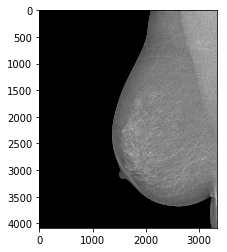

In [2]:
image = cv2.imread('inbreast/1/22427728_d713ef5849f98b6c_MG_R_ML_ANON.dcm.png')
image_np = np.array(image)
print(np.size(image_np))
plt.imshow(image,cmap='gray')

40774656


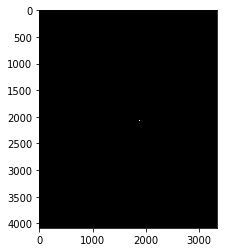

In [3]:
mask = cv2.imread('inbreast/1/22427728_mask.png')
mask_np = np.array(mask)
print(np.size(mask_np))
plt.imshow(mask_np)

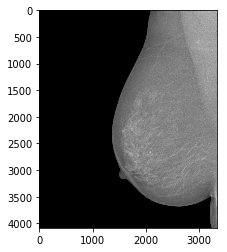

In [4]:
final_image = image+mask
plt.imshow(final_image)

In [5]:
from cv2 import *

TypeError: unhashable type: 'numpy.ndarray'

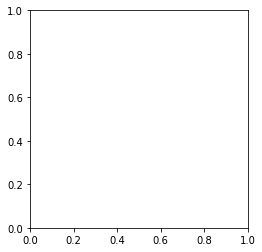

In [6]:
# Kernel definition
kernel = getStructuringElement(MORPH_ELLIPSE, (5, 5))

# Contrast enhancement
dilated = dilate(image, kernel)
topHat = morphologyEx(image, MORPH_TOPHAT, kernel)
blackHat = morphologyEx(image, MORPH_BLACKHAT, kernel)
accentuated = add(image, topHat)
highContrast = subtract(accentuated, blackHat)

# Background subtraction
backgroundSubtraction = subtract(highContrast, dilated)

# Threshold to extract microcalcifications
th, thresholding = threshold(backgroundSubtraction, 25, 255, THRESH_BINARY)

plt.imshow('Microcalcifications', thresholding)
